In [6]:
import pandas as pd
import csv
import os
print(os.getcwd())
all_data = []
with open('sum-interpret/output/output.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',)
    for row in spamreader:
        if row[-3] == '0':
            continue
        all_data.append(row)
import numpy as np


/home/jcxu


In [7]:
key = all_data[0]
data = all_data[1:]
import statistics
import random
print(key)
print(data[0])
print(len(data))

import seaborn as sns

import matplotlib.colors as mcolors

colors =[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colors = mcolors.TABLEAU_COLORS


['', 'lm2imp', 'lm2full', 'lm2imp_cnn', 'lm2full_cnn', 'lm2attn', 'imp2lm', 'imp2full', 'imp2imp_cnn', 'imp2full_cnn', 'imp2attn', 'full2lm', 'full2imp', 'full2imp_cnn', 'full2full_cnn', 'full2attn', 'imp_cnn2lm', 'imp_cnn2imp', 'imp_cnn2full', 'imp_cnn2full_cnn', 'imp_cnn2attn', 'full_cnn2lm', 'full_cnn2imp', 'full_cnn2full', 'full_cnn2imp_cnn', 'full_cnn2attn', 'attn2lm', 'attn2imp', 'attn2full', 'attn2imp_cnn', 'attn2full_cnn', 'pos', 'tok', 't', 'T', 'prefix']
['1', '0.0000289681047433987', '0.0000816108004073612', '0.0000940962927415967', '0.000076644129876513', '0.000159616931341588', '0.0000306574002024718', '0.0000683943217154592', '0.0000958536911639385', '0.0000838554697111249', '0.000163669712492265', '0.0000870781659614295', '0.0000514433704665862', '0.000124415193567984', '0.000100619385193568', '0.000108858817839064', '0.000106415325717535', '0.000137380629894324', '0.000194713458768092', '0.0000509637466166169', '0.000217204404179938', '0.0000727250735508278', '0.0000983

In [8]:
dict_pos = {}
index_of_pos = key.index('pos')
index_of_full2lm = key.index('full2lm')
index_of_lm2full = key.index('lm2full')

index_of_lm2imp = key.index('lm2imp')
index_of_imp2lm = key.index('imp2lm')

index_of_impood2imp = key.index('imp_cnn2imp')


index_of_imp2full = key.index('imp2full')
index_of_full2imp = key.index('full2imp')


index_of_tok = key.index('tok')
x = []
y = []
c = []
cnt = 0
d_color = {}
for d in data:
    pos = d[index_of_pos]
    v_lm2imp = float(d[index_of_impood2imp]) *1e5
    v_imp2full = float(d[index_of_imp2full])*1e5
    # if v_lm2imp>6.1 or v_imp2full>9.7:
        # continue
    x.append(v_lm2imp)
    y.append(v_imp2full)
    c.append(pos)
    # if pos in d_color:
    #     c.append(d_color[pos])
    # else:
    #     d_color[pos] = cnt
    #     cnt+=1
    #     c.append(d_color[pos])

from statistics import quantiles
print([round(q, 1) for q in quantiles(x, n=10)])
print([round(q, 1) for q in quantiles(y, n=10)])

[0.4, 0.8, 1.1, 1.4, 1.7, 2.2, 2.8, 3.7, 6.1]
[0.3, 0.9, 1.5, 2.2, 3.0, 4.0, 5.2, 6.8, 9.7]


In [9]:
from sklearn.cluster import KMeans
inp_kmeans = [[r,c] for r,c in zip(x,y)]
inp_kmeans = np.asarray(inp_kmeans)
kmeans = KMeans(n_clusters=3, random_state=0).fit(inp_kmeans)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
labels = kmeans.labels_
print(labels)

[[ 1.76517508  2.11133069]
 [ 2.52202379  9.32471847]
 [11.28382543  6.16294318]]
16543.5196513703
[2 1 0 ... 2 0 0]


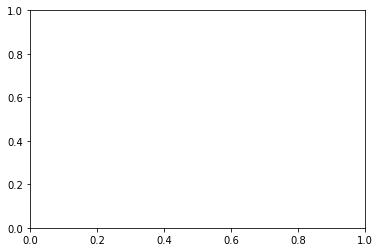

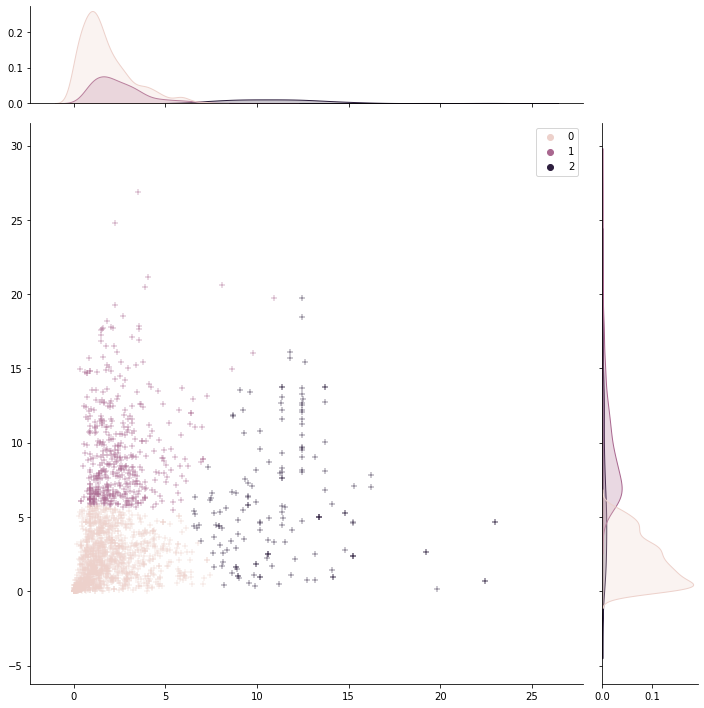

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# sns.relplot(x=x, y=y,)

# scatter = ax.scatter(x, y,s=1,c=c)
sns.jointplot(x=x,y=y,hue=labels,marginal_ticks=True,marker="+",height=10)

